In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn import datasets

# Utility Functions

In [11]:
def load_data(filepath):
    return pd.read_csv(filepath)

def plot_data(df, x_col, y_col, title="Data Distribution"):
    plt.scatter(df[x_col], df[y_col])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.show()

def perform_kmeans(df, features, n_clusters=3):
    km = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df['cluster'] = km.fit_predict(df[features])
    return km, df

def plot_clusters(df, features, km):
    colors = plt.cm.rainbow(np.linspace(0, 1, km.n_clusters))
    for i in range(km.n_clusters):
        cluster_data = df[df['cluster'] == i]
        plt.scatter(cluster_data[features[0]], cluster_data[features[1]], color=colors[i], label=f'Cluster {i}')
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='Centroids')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend()
    plt.title("Clustered Data")
    plt.show()

def scale_features(df, features):
    scaler = MinMaxScaler()
    df[features] = scaler.fit_transform(df[features])
    return df

def plot_elbow_method(df, features, k_range=(1, 10)):
    sse = []
    for k in range(*k_range):
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        km.fit(df[features])
        sse.append(km.inertia_)
    plt.plot(range(*k_range), sse, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method for Optimal K')
    plt.show()

# Explore Clustering for Multiple Elbow Numbers
def scatter_elbow(X, X_scaled, n_clusters):
    """
    Visualize clustering results for a given number of clusters.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='rainbow', s=50, alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='X', s=200, label='Centroids')
    plt.title(f'Clustering with {n_clusters} Clusters')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.legend()
    plt.show()

# Income Data Analysis

In [6]:
filepath = "data/income.csv"
features = ['Age', 'Income($)']
df = load_data(filepath)

In [8]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


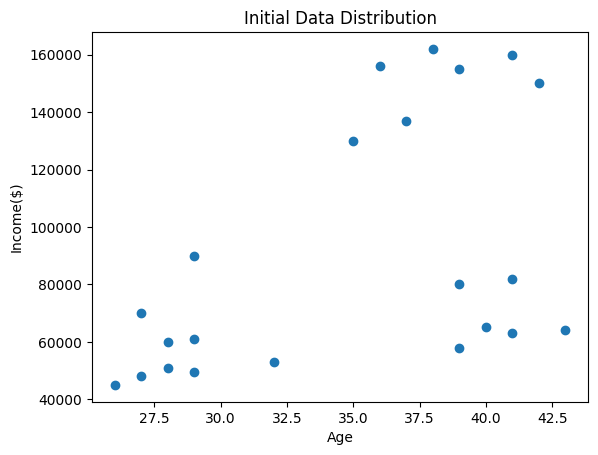

In [7]:
plot_data(df, 'Age', 'Income($)', title="Initial Data Distribution")

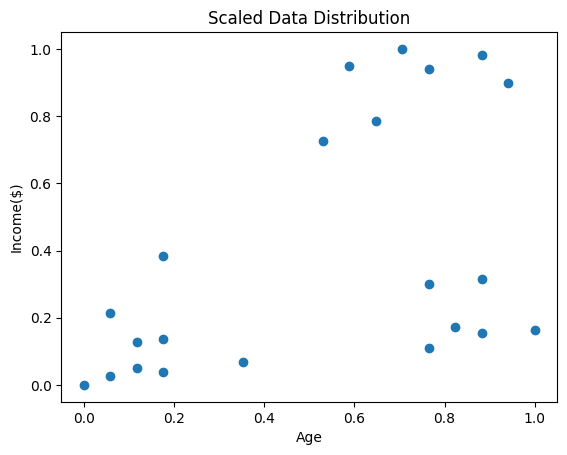

In [9]:
df = scale_features(df, features)
plot_data(df, 'Age', 'Income($)', title="Scaled Data Distribution")

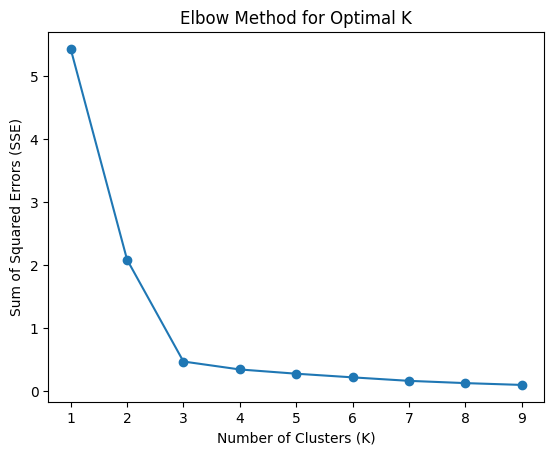

In [15]:
plot_elbow_method(df, features)

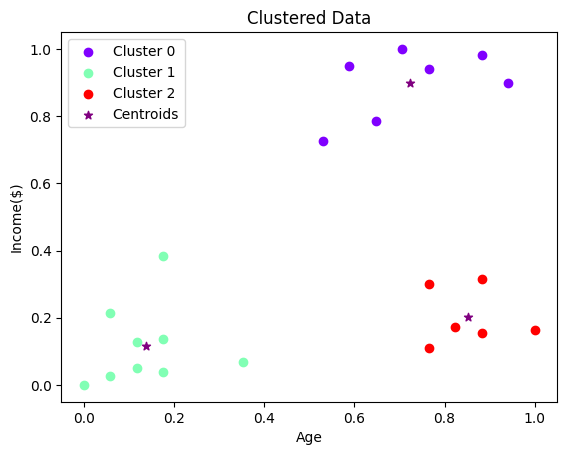

In [14]:
km, df = perform_kmeans(df, features, n_clusters=3)
plot_clusters(df, features, km)

# Iris Data Analysis

In [18]:
iris = datasets.load_iris()
X = iris.data
y = pd.DataFrame(iris.target, columns=['Targets'])
iris_df = pd.DataFrame(X, columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])

In [21]:
iris_df.head()
# y.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


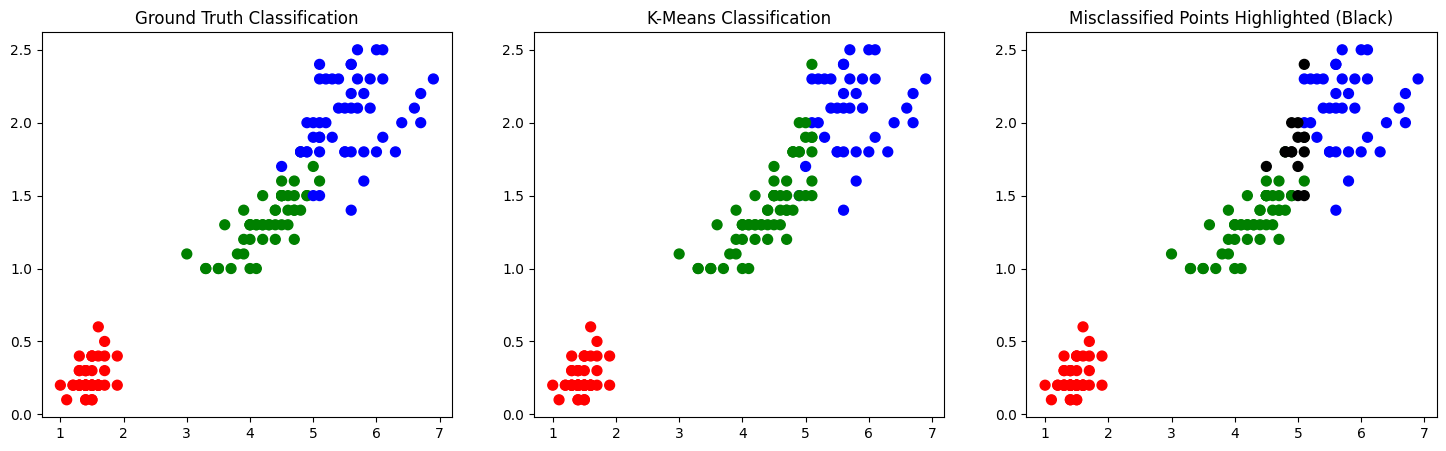

In [25]:
# Fit K-Means clustering
clustering = KMeans(n_clusters=3, random_state=5).fit(iris_df)

# Relabel clusters to match the ground truth order
relabel = np.choose(clustering.labels_, [0, 1, 2]).astype(np.int64)

# Define color mapping for correct classifications
color_theme = np.array(['red', 'green', 'blue'])

# Identify misclassified points
misclassified = relabel != y['Targets']
colors_with_misclassification = np.where(misclassified, 'black', color_theme[relabel])

# Create the plots
plt.figure(figsize=(18, 5))

# Ground Truth Plot
plt.subplot(1, 3, 1)
plt.scatter(iris_df.Petal_Length, iris_df.Petal_Width, c=color_theme[y['Targets']], s=50)
plt.title('Ground Truth Classification')

# K-Means Clustering Plot
plt.subplot(1, 3, 2)
plt.scatter(iris_df.Petal_Length, iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-Means Classification')

# Misclassified Points Highlighted
plt.subplot(1, 3, 3)
plt.scatter(iris_df.Petal_Length, iris_df.Petal_Width, c=colors_with_misclassification, s=50)
plt.title('Misclassified Points Highlighted (Black)')

plt.show()

In [ ]:
print(classification_report(y, relabel))

# Categorical Data Analysis

In [28]:
df = pd.read_csv('data/Categorical.csv')
df['continent_code'] = df['continent'].astype('category').cat.codes

In [29]:
df.head()

,name,Longitude,Latitude,continent,continent_code
0,Aruba,-69.982677,12.520880,North America,4
1,Afghanistan,66.004734,33.835231,Asia,2
2,Angola,17.537368,-12.293361,Africa,0
3,Anguilla,-63.064989,18.223959,North America,4
4,Albania,20.049834,41.142450,Europe,3


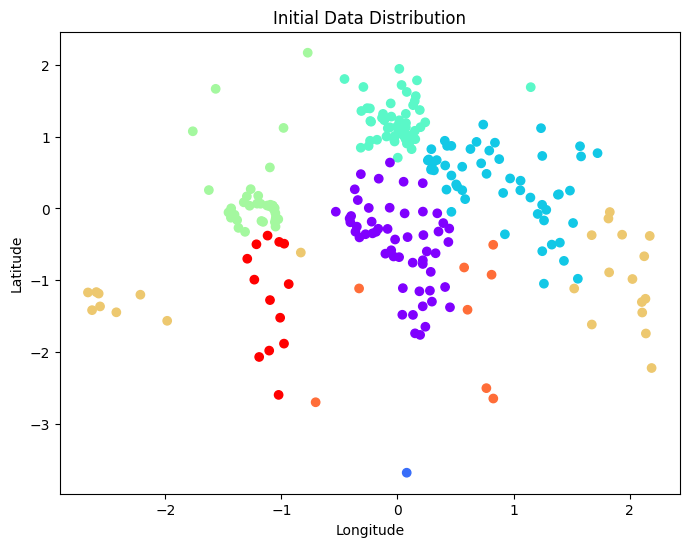

In [34]:
var1, var2, var3 = 'Longitude', 'Latitude', 'continent_code'
df_scaled = StandardScaler().fit_transform(df[[var1, var2, var3]])
df_scaled = pd.DataFrame(df_scaled, columns=[var1, var2, var3])

plt.figure(figsize=(8, 6))
plt.scatter(df_scaled[var1], df_scaled[var2], c=df_scaled[var3], cmap='rainbow')
plt.xlabel(var1)
plt.ylabel(var2)
plt.title("Initial Data Distribution")
plt.show()

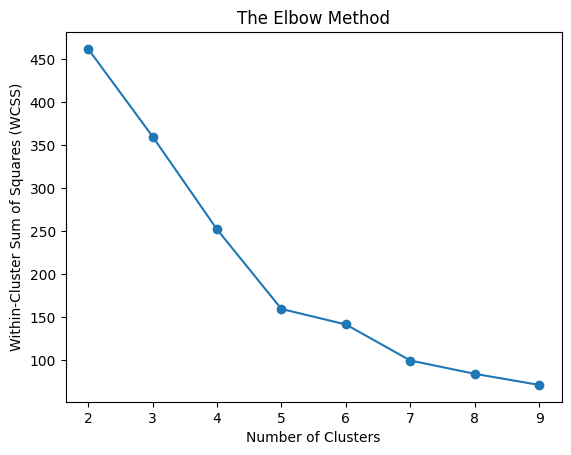

In [35]:
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('The Elbow Method')
plt.show()

# Penguins Data Analysis

In [ ]:
df = pd.read_csv("../../../Datasets/penguins.csv")
features = ['bill_length_mm', 'bill_depth_mm']
X = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], alpha=0.6, c='gray')
plt.title('Initial Data Distribution')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.show()
wcss = [KMeans(n_clusters=k, random_state=42).fit(X_scaled).inertia_ for k in range(2, 10)]
plt.plot(range(2, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()


# Test Different Cluster Numbers
for n in [3, 4, 5, 6]:
    scatter_elbow(X, X_scaled, n_clusters=n)